<a href="https://colab.research.google.com/github/1di0t/DeepLearning/blob/main/jupyter_file/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 새 섹션

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


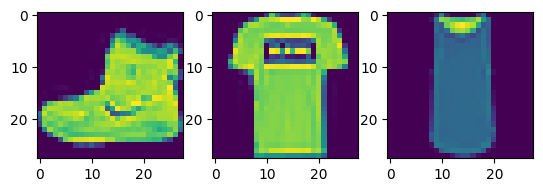

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
plt.show()

In [5]:
print(train_labels[:3])#https://keras.io/api/datasets/fashion_mnist/

[9 0 0]


In [6]:
#learning
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6710 - loss: 9.8493
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6995 - loss: 0.7948
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7353 - loss: 0.6724
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7792 - loss: 0.5983
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8067 - loss: 0.5429


In [9]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"손실 : {test_loss} 정확도 : {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.8098 - loss: 0.5439
손실 : 0.5439080595970154 정확도 : 0.8098000288009644


In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
import numpy as np

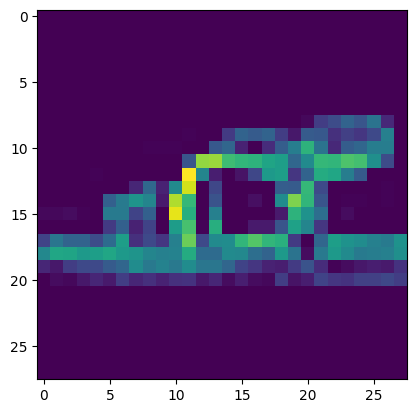

In [12]:
randIdx = np.random.randint(0,1000)
plt.imshow(test_images[randIdx])

In [14]:
yhat = model.predict(test_images[randIdx][np.newaxis,:,:])
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[9.3955203e-24, 5.2782469e-35, 6.7950191e-24, 7.7293480e-37,
        1.6048479e-16, 9.9843282e-01, 8.2262601e-34, 1.3679644e-03,
        2.4924040e-07, 1.9895367e-04]], dtype=float32)

In [15]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis,:,:]))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


5

In [18]:
class_names=['T-shirt/top','Trousrer','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [19]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis,:,:]))
print(class_names[yhat])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sandal


In [31]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.fit(train_images,train_labels,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6838 - loss: 4.4778
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8082 - loss: 0.5478
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8317 - loss: 0.4808
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8432 - loss: 0.4438
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8502 - loss: 0.4198
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8586 - loss: 0.3969
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8656 - loss: 0.3711
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8679 - loss: 0.3627
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8726 - loss: 0.3484
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8776 - loss: 0.3389


In [32]:
pred_1 = model.predict(test_images)
pred_2 = model2.predict(test_images)
pred_1,pred_2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(array([[1.9647274e-26, 2.4537337e-23, 0.0000000e+00, ..., 6.8419524e-02,
         7.5105138e-18, 9.3090981e-01],
        [1.2468953e-03, 3.1352905e-04, 7.7226335e-01, ..., 0.0000000e+00,
         1.2197172e-07, 1.0973717e-25],
        [1.7207625e-13, 9.9999994e-01, 3.3882089e-17, ..., 0.0000000e+00,
         5.7593253e-22, 0.0000000e+00],
        ...,
        [8.8427396e-04, 2.7597584e-06, 1.8110186e-05, ..., 6.7065809e-21,
         9.7855151e-01, 7.2957264e-18],
        [1.1711108e-12, 9.9999994e-01, 1.4614443e-37, ..., 0.0000000e+00,
         1.9084569e-12, 0.0000000e+00],
        [4.1820698e-19, 2.8062945e-27, 0.0000000e+00, ..., 2.5759727e-02,
         3.4689892e-04, 1.4167831e-02]], dtype=float32),
 array([[6.84368843e-03, 2.65672906e-09, 6.92202884e-04, ...,
         5.77777773e-02, 2.56498973e-03, 9.15974557e-01],
        [7.55937595e-04, 8.73397887e-09, 8.99031699e-01, ...,
         1.22877376e-16, 2.00594741e-07, 6.47330901e-16],
        [3.46373541e-15, 9.99999940e-01, 1.127

In [33]:
y_hat1 = np.argmax(pred_1,axis=1)
y_hat2 = np.argmax(pred_2,axis=1)
y_hat1, y_hat2

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5]))

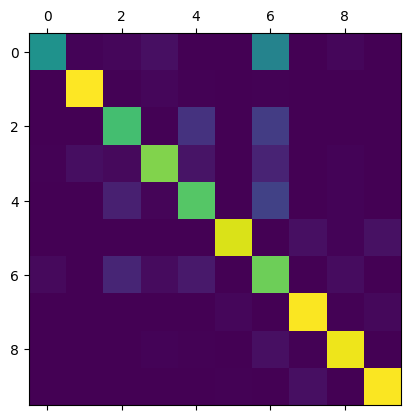

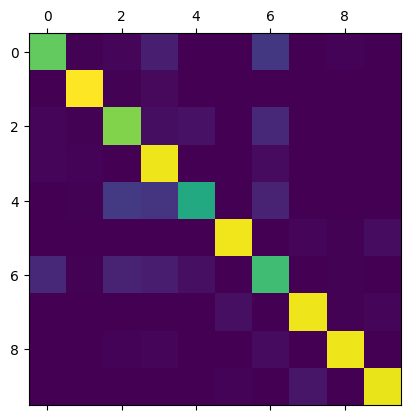

In [34]:
from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(test_labels,y_hat1)
conf_mat2 = confusion_matrix(test_labels,y_hat2)
plt.matshow(conf_mat1)
plt.matshow(conf_mat2)